In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams,cm
rcParams['figure.figsize']=(20,10)
rcParams['font.size']=15

import os

In [0]:
df=pd.read_csv('district wise rainfall normal.csv')

In [7]:
df.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [8]:
df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.2+ KB


In [10]:
df['JAN']+df['FEB']

0      165.2
1       69.7
2       48.6
3      123.0
4      112.8
5       76.3
6      114.9
7      123.0
8      237.6
9      241.2
10     101.3
11     206.8
12     251.0
13      92.7
14     237.6
15      78.7
16     123.4
17      78.7
18     152.7
19      63.5
20      34.5
21      33.1
22      32.8
23      76.3
24      64.2
25      34.5
26      53.3
27      37.2
28      22.0
29      83.7
       ...  
611      2.8
612      3.6
613      2.6
614      7.7
615      3.8
616      7.2
617      5.5
618      6.0
619      0.9
620      5.4
621      9.0
622      9.4
623      1.9
624      6.2
625      6.7
626     45.4
627      4.5
628     32.0
629     37.9
630      6.2
631      5.6
632      9.4
633     51.2
634     10.9
635     40.4
636     35.5
637      3.3
638     65.0
639     13.1
640     35.5
Length: 641, dtype: float64

In [11]:
annual=0
for i in range(2,14):
    annual=annual+df.iloc[:,i]
annual.head()

0    2805.2
1    3015.7
2    2913.3
3    3043.8
4    4034.7
dtype: float64

In [12]:
df=df.drop(df.iloc[:,14:].columns,axis=1)
df.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7


In [0]:
df_state=df.groupby('STATE_UT_NAME').mean()

In [14]:
df_state.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
STATE_UT_NAME,,,,,,,,,,,,
ANDAMAN And NICOBAR ISLANDS,61.233333,33.266667,30.800000,86.966667,358.833333,418.666667,390.566667,385.300000,421.733333,301.100000,263.200000,159.733333
ANDHRA PRADESH,6.321739,7.352174,10.095652,19.873913,48.765217,114.369565,185.365217,179.426087,160.373913,138.600000,58.965217,15.565217
ARUNACHAL PRADESH,53.687500,93.293750,165.018750,275.162500,300.262500,491.381250,547.581250,378.600000,366.475000,176.768750,43.187500,35.956250
ASSAM,15.733333,31.714815,77.762963,181.266667,333.870370,465.185185,494.844444,377.370370,303.800000,136.448148,24.922222,11.440741
BIHAR,13.134211,9.278947,9.873684,16.865789,51.673684,168.781579,340.836842,289.481579,223.378947,64.747368,6.715789,5.786842


In [15]:
df_state.T.head()

STATE_UT_NAME,ANDAMAN And NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHATISGARH,DADAR NAGAR HAVELI,DAMAN AND DUI,DELHI,GOA,GUJARAT,HARYANA,HIMACHAL,JAMMU AND KASHMIR,JHARKHAND,KARNATAKA,KERALA,LAKSHADWEEP,MADHYA PRADESH,MAHARASHTRA,MANIPUR,MEGHALAYA,MIZORAM,NAGALAND,ORISSA,PONDICHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARANCHAL,WEST BENGAL
JAN,61.233333,6.321739,53.68750,15.733333,13.134211,44.3,10.377778,0.4,0.55,16.4,0.55,0.784615,19.485714,81.925000,77.977273,15.837500,2.026667,9.542857,20.8,12.892,4.791429,22.600000,14.900000,11.566667,18.481818,10.810000,26.750,25.965,5.348485,47.55,18.906250,11.225,17.183099,49.892308,15.031579
FEB,33.266667,7.352174,93.29375,31.714815,9.278947,38.9,10.472222,0.3,0.50,16.3,0.05,0.392308,16.457143,80.450000,91.645455,16.320833,2.696667,16.200000,14.7,9.158,3.474286,55.122222,21.685714,29.944444,27.672727,22.370000,25.425,24.480,4.721212,77.30,14.021875,33.650,13.157746,49.592308,19.084211
MAR,30.800000,10.095652,165.01875,77.762963,9.873684,33.2,12.977778,0.0,0.20,15.3,0.55,1.142308,13.738095,87.633333,119.986364,16.516667,7.163333,31.071429,11.8,7.486,5.997143,82.411111,74.757143,96.255556,63.018182,27.453333,16.725,25.900,3.815152,130.60,18.068750,93.625,10.107042,51.669231,27.973684
APR,86.966667,19.873913,275.16250,181.266667,16.865789,14.8,13.116667,0.0,0.10,8.9,7.80,0.507692,7.619048,47.683333,82.268182,18.662500,36.773333,109.021429,48.9,3.270,6.974286,150.766667,211.228571,152.600000,134.227273,36.653333,12.275,12.160,3.303030,206.90,42.596875,220.750,5.318310,29.815385,56.647368
MAY,358.833333,48.765217,300.26250,333.870370,51.673684,30.1,17.483333,7.4,4.15,19.3,87.75,4.803846,14.642857,54.358333,65.136364,45.875000,88.166667,244.728571,171.7,7.006,19.925714,213.377778,430.042857,321.322222,213.381818,70.723333,40.825,16.165,10.627273,323.55,67.531250,391.575,15.561972,58.392308,139.489474


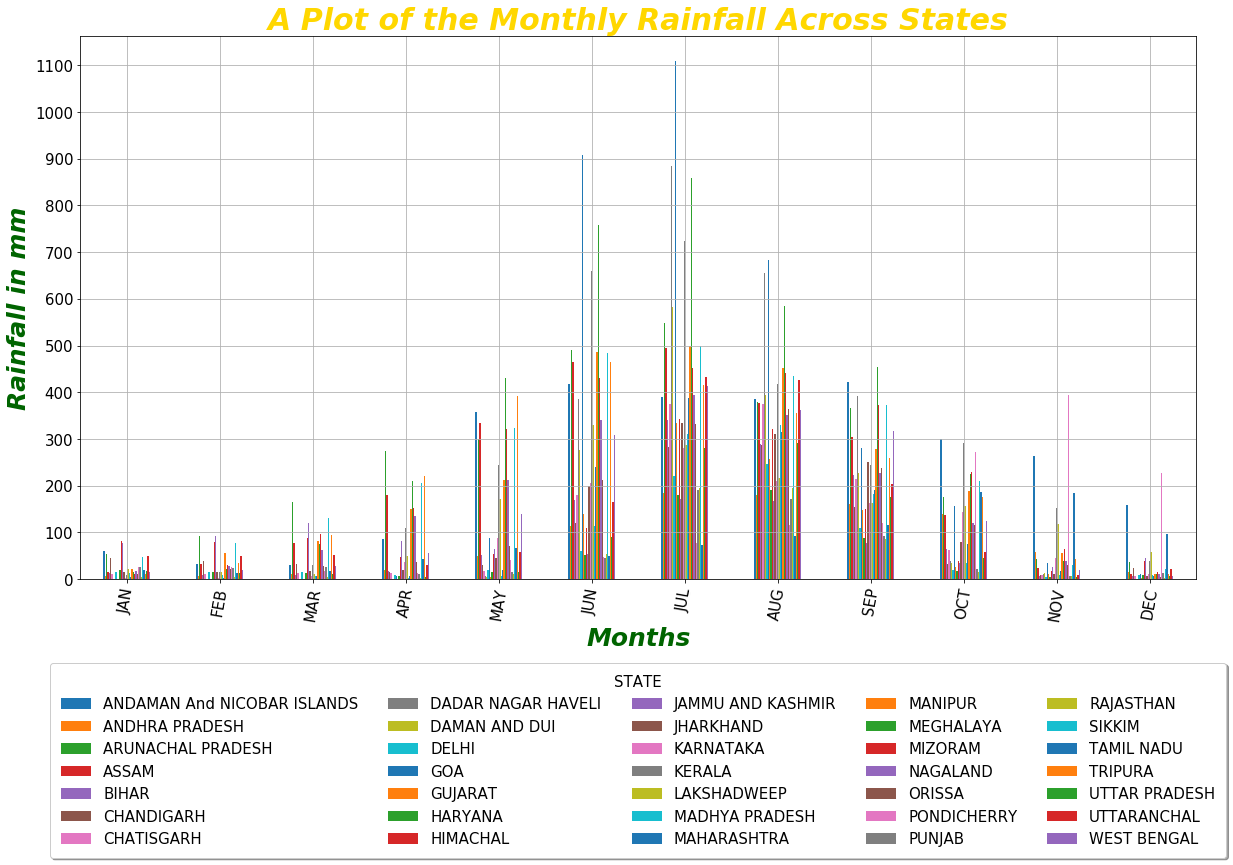

In [16]:
df_state.T.plot.bar(
                   
                    #         stacked=True, 
                              rot=80, 
                              lw=3,
                              grid=True,
                              yticks=range(0, 1200, 100),
                             )

_=plt.legend(
          fancybox=True,
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.14),  
          shadow=True, 
          ncol=5, 
          borderpad=0.75,
          title='STATE',
          frameon=True,
            )
_ = plt.title(
    'A Plot of the Monthly Rainfall Across States', 
    fontsize=30, 
    color='gold', 
    weight='bold', 
    style='italic',
            )
_ = plt.xlabel(
    'Months', 
    fontsize=25, 
    weight='bold', 
    color='darkgreen', 
    style='italic'
            )
_ = plt.ylabel(
    'Rainfall in mm', 
    fontsize=25, 
    weight='bold', 
    color='darkgreen', 
    style='italic'
            )

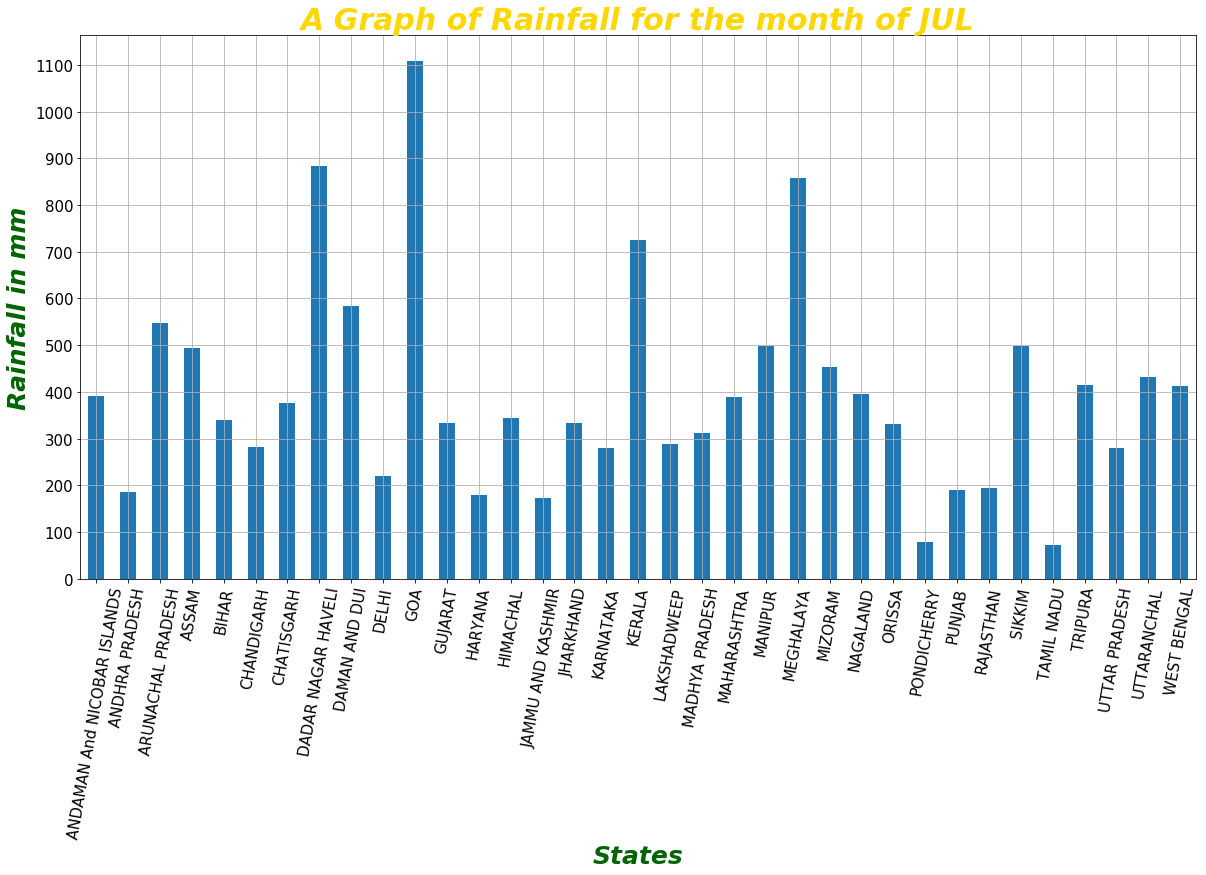

In [17]:
month = 'JUL'
df_state.T.loc[month].plot.bar(
                              stacked=True, 
                              rot=80, 
                              lw=3,
                              grid=True,
                              yticks=range(0, 1200, 100),
                              )
#_ = plt.legend(
#          fancybox=True,
 #         loc='upper center', 
   #        bbox_to_anchor=(0.5, -0.08),  
    #       shadow=True, 
     #      ncol=5, 
      #     borderpad=0.90,
       #    title='SUBDIVISION',
        #   frameon=True,
         # )
_ = plt.title(
    'A Graph of Rainfall for the month of ' + month, 
    fontsize=30, 
    color='gold', 
    weight='bold', 
    style='italic',
            )
_ = plt.xlabel(
    'States', 
    fontsize=25, 
    weight='bold', 
    color='darkgreen', 
    style='italic'
            )
_ = plt.ylabel(
    'Rainfall in mm', 
    fontsize=25, 
    weight='bold', 
    color='darkgreen', 
    style='italic'
            )

In [36]:
rainfall_df = pd.read_csv('rainfall in india 1901-2015.csv')
rainfall_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [37]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


In [38]:
rainfall_df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [39]:
rainfall_df.groupby('SUBDIVISION').count()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
SUBDIVISION,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,110,110,110,108,108,109,108,108,108,107,108,108,107,104,110,107,107,107
ARUNACHAL PRADESH,97,96,96,95,97,97,96,96,97,97,95,95,95,91,96,95,95,94
ASSAM & MEGHALAYA,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
BIHAR,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
CHHATTISGARH,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
COASTAL ANDHRA PRADESH,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
COASTAL KARNATAKA,115,114,115,115,115,115,115,115,115,115,115,115,115,114,114,115,115,115
EAST MADHYA PRADESH,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
EAST RAJASTHAN,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115


In [40]:
rainfall_df=rainfall_df.drop(rainfall_df.iloc[:,14:].columns,axis=1)
rainfall_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [41]:
rainfall_df=rainfall_df.groupby(['SUBDIVISION','YEAR']).sum()
rainfall_df.head()

JAN    FEB   MAR  ...    OCT    NOV    DEC
SUBDIVISION               YEAR                     ...                     
ANDAMAN & NICOBAR ISLANDS 1901  49.2   87.1  29.2  ...  388.5  558.2   33.6
                          1902   0.0  159.8  12.2  ...  197.2  359.0  160.5
                          1903  12.7  144.0   0.0  ...  181.2  284.4  225.0
                          1904   9.4   14.7   0.0  ...  222.2  308.7   40.1
                          1905   1.3    0.0   3.3  ...  260.7   25.4  344.7

[5 rows x 12 columns]

In [42]:
rainfall_df=rainfall_df.stack()
rainfall_df.head()

SUBDIVISION                YEAR     
ANDAMAN & NICOBAR ISLANDS  1901  JAN     49.2
                                 FEB     87.1
                                 MAR     29.2
                                 APR      2.3
                                 MAY    528.8
dtype: float64

In [0]:
rainfall_df=rainfall_df.reset_index()

In [46]:
#rainfall_df.reset_index()
rainfall_df.rename(columns={'level_2': 'MONTH', 0 : 'RAINFALL in mm'}, inplace=True)
rainfall_df.head()

,SUBDIVISION,YEAR,MONTH,RAINFALL in mm
0,ANDAMAN & NICOBAR ISLANDS,1901,JAN,49.2
1,ANDAMAN & NICOBAR ISLANDS,1901,FEB,87.1
2,ANDAMAN & NICOBAR ISLANDS,1901,MAR,29.2
3,ANDAMAN & NICOBAR ISLANDS,1901,APR,2.3
4,ANDAMAN & NICOBAR ISLANDS,1901,MAY,528.8


In [0]:
rainfall_df['MONTH']=rainfall_df['MONTH'].str.capitalize()
rainfall_df.head()

In [0]:
from pandas.tseries.offsets import MonthEnd

In [0]:
rainfall_df['Date']=pd.to_datetime(rainfall_df['YEAR'].astype(str)+rainfall_df['MONTH'],format="%Y%b") + MonthEnd(1)

In [58]:
rainfall_df.head()

,SUBDIVISION,YEAR,MONTH,RAINFALL in mm,Date
0,ANDAMAN & NICOBAR ISLANDS,1901,Jan,49.2,1901-01-31
1,ANDAMAN & NICOBAR ISLANDS,1901,Feb,87.1,1901-02-28
2,ANDAMAN & NICOBAR ISLANDS,1901,Mar,29.2,1901-03-31
3,ANDAMAN & NICOBAR ISLANDS,1901,Apr,2.3,1901-04-30
4,ANDAMAN & NICOBAR ISLANDS,1901,May,528.8,1901-05-31


In [0]:
rainfall_df=rainfall_df.drop(['YEAR','MONTH'],axis=1)


In [61]:
rainfall_df.head()

,SUBDIVISION,RAINFALL in mm,Date
0,ANDAMAN & NICOBAR ISLANDS,49.2,1901-01-31
1,ANDAMAN & NICOBAR ISLANDS,87.1,1901-02-28
2,ANDAMAN & NICOBAR ISLANDS,29.2,1901-03-31
3,ANDAMAN & NICOBAR ISLANDS,2.3,1901-04-30
4,ANDAMAN & NICOBAR ISLANDS,528.8,1901-05-31


In [0]:
rainfall_df=rainfall_df.pivot(index='Date',columns='SUBDIVISION',values='RAINFALL in mm')

In [72]:
moving_mean=rainfall_df.rolling(12).mean()
moving_mean.tail()

SUBDIVISION,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,ASSAM & MEGHALAYA,BIHAR,CHHATTISGARH,COASTAL ANDHRA PRADESH,COASTAL KARNATAKA,EAST MADHYA PRADESH,EAST RAJASTHAN,EAST UTTAR PRADESH,GANGETIC WEST BENGAL,GUJARAT REGION,HARYANA DELHI & CHANDIGARH,HIMACHAL PRADESH,JAMMU & KASHMIR,JHARKHAND,KERALA,KONKAN & GOA,LAKSHADWEEP,MADHYA MAHARASHTRA,MATATHWADA,NAGA MANI MIZO TRIPURA,NORTH INTERIOR KARNATAKA,ORISSA,PUNJAB,RAYALSEEMA,SAURASHTRA & KUTCH,SOUTH INTERIOR KARNATAKA,SUB HIMALAYAN WEST BENGAL & SIKKIM,TAMIL NADU,TELANGANA,UTTARAKHAND,VIDARBHA,WEST MADHYA PRADESH,WEST RAJASTHAN,WEST UTTAR PRADESH
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-31,240.000000,222.741667,213.158333,80.825000,101.275000,86.375000,264.591667,86.508333,63.791667,62.833333,134.333333,63.900000,40.400000,102.958333,140.800000,99.616667,208.141667,188.341667,112.483333,53.175000,39.616667,158.966667,45.175000,110.208333,46.475000,50.391667,38.766667,87.733333,207.300000,80.741667,72.433333,113.466667,89.133333,99.391667,42.266667,55.000000
2015-09-30,249.200000,225.341667,201.466667,75.941667,98.291667,91.150000,254.675000,80.841667,54.058333,55.766667,128.875000,52.091667,37.466667,102.200000,121.416667,91.858333,207.650000,173.458333,114.833333,55.358333,45.433333,155.216667,50.225000,106.533333,43.425000,54.966667,37.158333,87.975000,205.916667,80.700000,73.391667,108.858333,84.350000,87.975000,38.166667,50.150000
2015-10-31,236.658333,227.850000,203.766667,72.825000,93.275000,79.825000,253.183333,79.325000,54.208333,50.525000,126.858333,52.000000,36.900000,102.066667,125.991667,90.008333,203.700000,172.850000,114.516667,56.175000,45.875000,159.308333,48.633333,99.275000,43.675000,55.141667,37.000000,84.075000,207.783333,70.733333,72.225000,106.858333,83.491667,88.308333,38.216667,49.508333
2015-11-30,239.583333,228.991667,204.683333,72.825000,93.108333,84.616667,260.200000,79.266667,54.250000,50.566667,127.041667,51.916667,37.075000,102.900000,127.991667,90.025000,214.041667,174.458333,128.850000,54.791667,44.616667,159.358333,47.025000,99.608333,43.683333,83.975000,36.800000,93.900000,209.325000,93.150000,71.350000,107.058333,82.975000,88.083333,38.208333,49.675000
2015-12-31,242.041667,230.625000,205.916667,72.725000,93.141667,84.250000,258.825000,78.266667,54.225000,50.275000,127.516667,51.916667,36.291667,100.875000,131.075000,90.150000,216.725000,173.483333,136.908333,53.708333,44.341667,160.183333,45.991667,100.833333,42.566667,87.258333,36.800000,92.708333,209.875000,100.383333,71.433333,103.966667,82.800000,86.850000,38.208333,48.566667


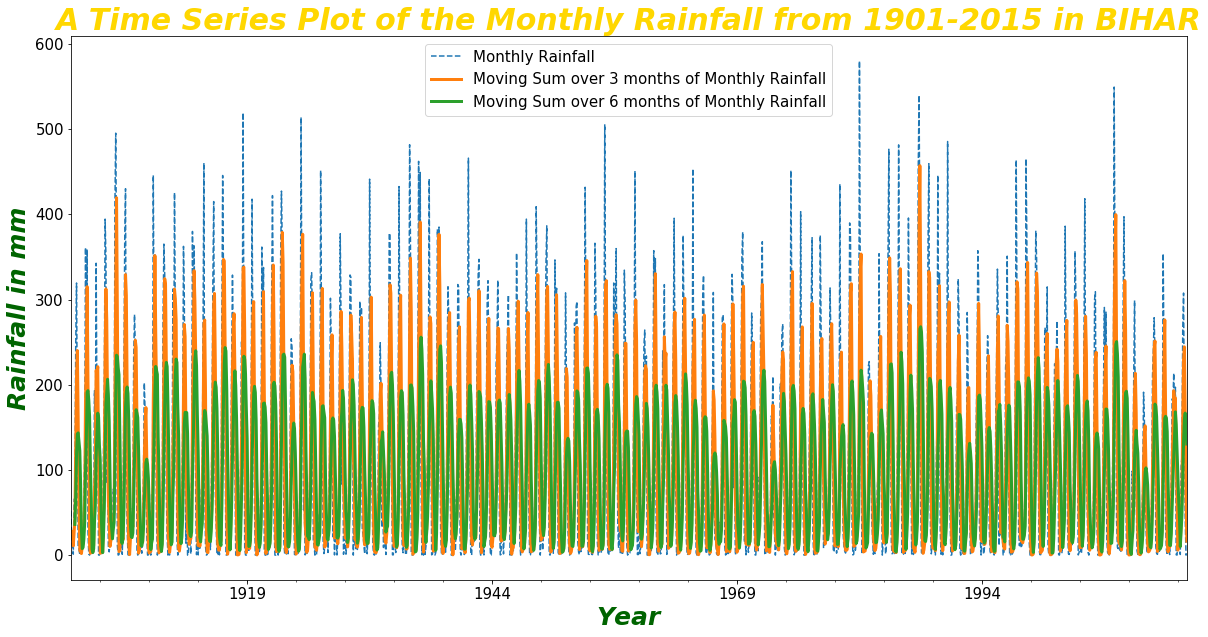

In [73]:
start_year=1901
end_year=2015
state='BIHAR'
plot_df=rainfall_df.loc[
                rainfall_df.index.year.isin(range(start_year, end_year)), 
                state]
plot_df.plot(linestyle='--',
             legend=True, 
             label='Monthly Rainfall')
plot_df.rolling(3).mean().plot(lw=3, 
                               legend=True, 
                               label='Moving Sum over 3 months of Monthly Rainfall'
                                                )
plot_df.rolling(6).mean().plot(lw=3, 
                               legend=True, 
                               label='Moving Sum over 6 months of Monthly Rainfall'
                                                )

_ = plt.title(
    'A Time Series Plot of the Monthly Rainfall from ' + str(start_year) + '-' + str(end_year) + ' in ' + state, 
    fontsize=30, 
    color='gold', 
    weight='bold', 
    style='italic',
            )
_ = plt.xlabel(
    'Year', 
    fontsize=25, 
    weight='bold', 
    color='darkgreen', 
    style='italic'
            )
_ = plt.ylabel(
    'Rainfall in mm', 
    fontsize=25, 
    weight='bold', 
    color='darkgreen', 
    style='italic'
            )
